In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# from statannotations.Annotator import Annotator #https://github.com/trevismd/statannotations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# if getting OptionError: "No such keys(s): 'mode.use_inf_as_null'"
# !pip install --upgrade seaborn pandas

import matplotlib as mpl
import os
from glob import glob

from _load_data import * # Getting our specific labels, formatting, and data

# Getting some free samples
results_df.sample(3)

print(gens)

# Don't change any code below, it may break (probably will) --------------------

['../models/SimplifierTopDown.py', '../models/SimplifierBottomUp.py', '../models/Vanilla.py'] ['Simplifier Top Down', 'Simplifier Bottom Up', 'Without simplification']
(540, 14)
['Simplifier Top Down' 'Simplifier Bottom Up' 'Without simplification']
['Airfoil' 'Concrete' 'Energy Cooling' 'Energy Heating' 'Housing' 'Tower']
range(10, 250, 25)


In [2]:
all_data = []
for i, row in results_df.iterrows():
    model, dataset, random_state = row.loc[['model', 'dataset', 'random_state']]

    files = glob(f"{results_path}/{dnames_to_ugly[dataset]}/{nice_to_ugly[model]}/"
                f"*{random_state}_evolution.csv")

    for file in files:
        data = pd.read_csv(file)
        
        for gen in gens:
            try:
                row = data[data['gen']==gen].iloc[0] # should have just 1 row
            except Exception as e:
                pass
                # print(e)
                # print(file, gen)
                # print(row)

            all_data.append((model, dataset, *row))
            
all_data_df = pd.DataFrame(all_data, 
                           columns=(
                               'model',
                               'dataset',
                               *row.index
                           ))

all_data_df = all_data_df.replace([np.inf, -np.inf], np.nan).dropna()

print(all_data_df.shape)
print(all_data_df['model'].unique())
print(all_data_df['dataset'].unique())
all_data_df.sample(5)

(5397, 27)
['Simplifier Top Down' 'Simplifier Bottom Up' 'Without simplification']
['Airfoil' 'Concrete' 'Energy Cooling' 'Energy Heating' 'Housing' 'Tower']


,model,dataset,gen,evals,best_size,n_simplifications,n_new_hashes,avg train error,avg train size,avg val error,...,std val error,std val size,min train error,min train size,min val error,min val size,max train error,max train size,max val error,max val size
1625,Without simplification,Concrete,135.0,100.0,16.0,0.0,0.0,236.407850,3.57,273.539747,...,72.714049,3.533426,84.207391,2.0,82.070987,2.0,263.543197,16.0,310.087184,16.0
1340,Simplifier Bottom Up,Concrete,10.0,100.0,6.0,105.0,92.0,272.891896,2.93,251.736861,...,24.817202,1.079398,214.013902,2.0,201.509650,2.0,330.654001,6.0,292.459904,6.0
1489,Simplifier Bottom Up,Concrete,235.0,100.0,14.0,83.0,52.0,257.298712,2.86,266.905963,...,46.029618,2.518015,86.649412,2.0,110.550902,2.0,275.126585,14.0,284.212459,14.0
4496,Without simplification,Housing,160.0,100.0,20.0,0.0,0.0,76.511648,3.39,45.792323,...,12.120518,4.014710,21.011226,2.0,13.252949,2.0,85.313092,20.0,50.687065,20.0
4692,Simplifier Top Down,Tower,60.0,100.0,6.0,45.0,71.0,0.610959,2.18,0.620658,...,0.027271,0.740000,0.484741,2.0,0.469731,2.0,0.616836,6.0,0.627213,6.0


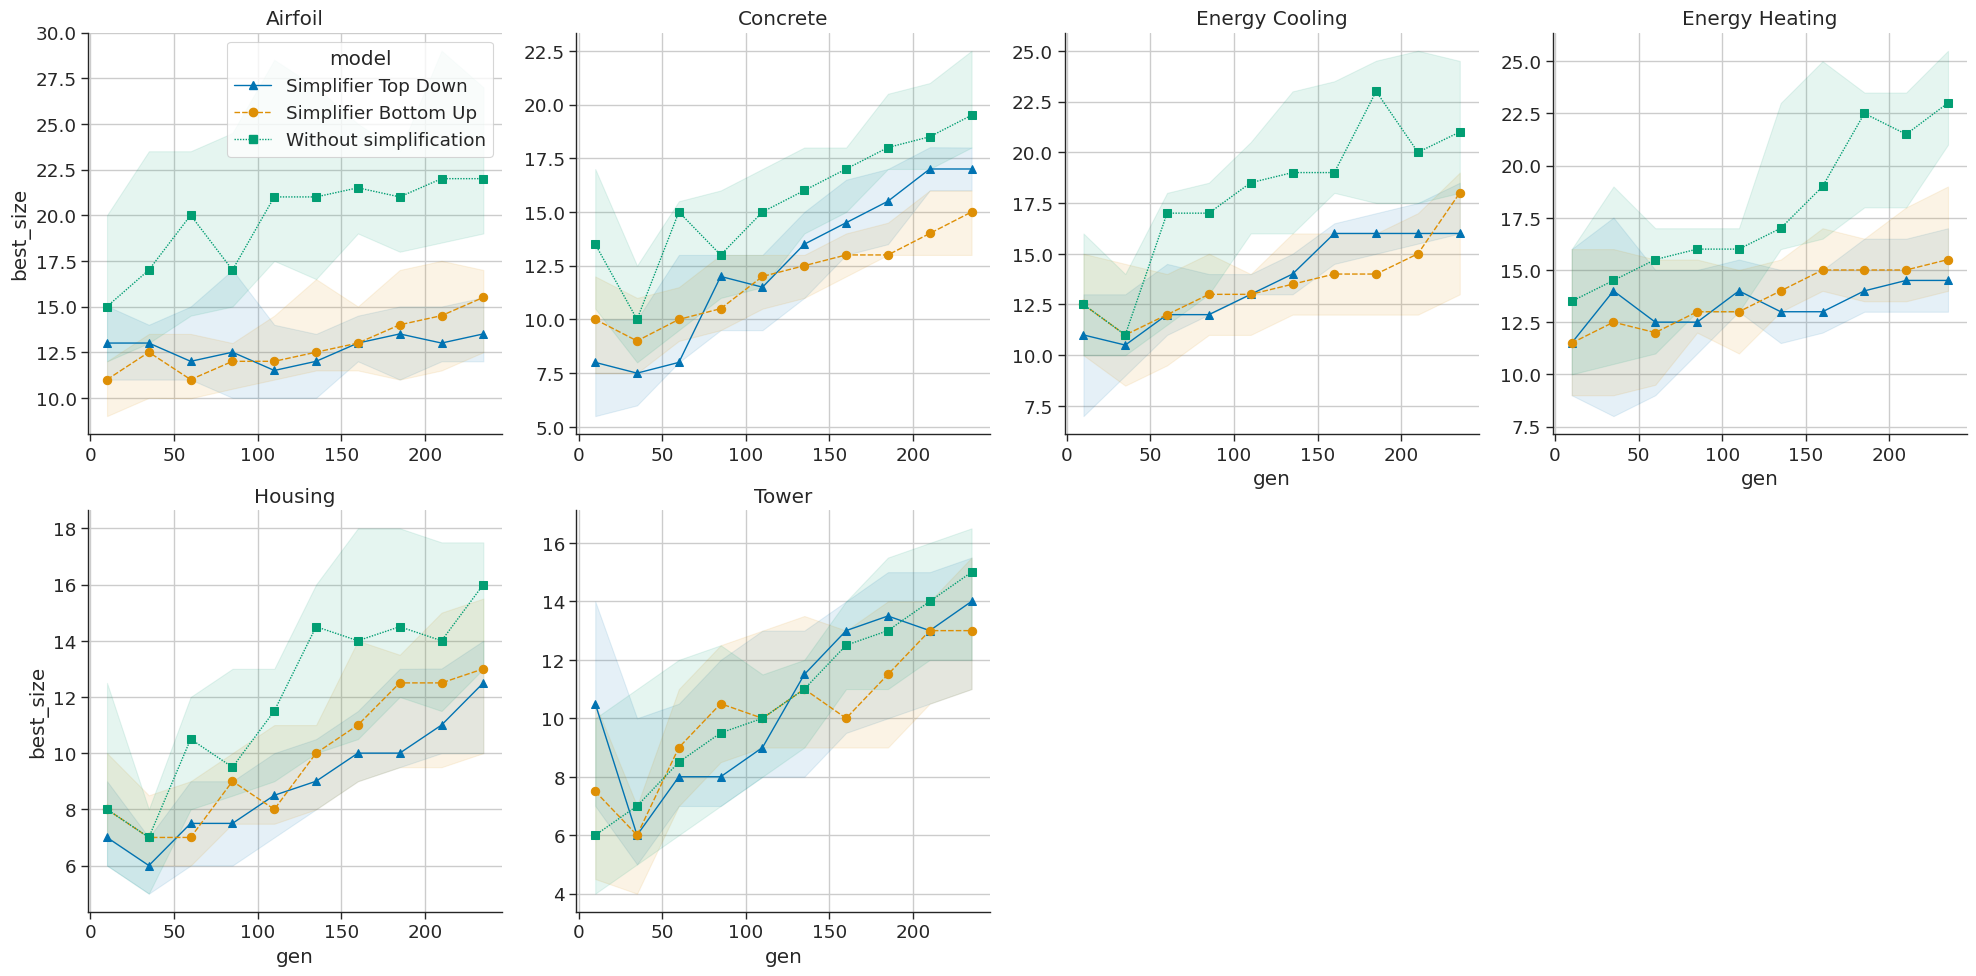

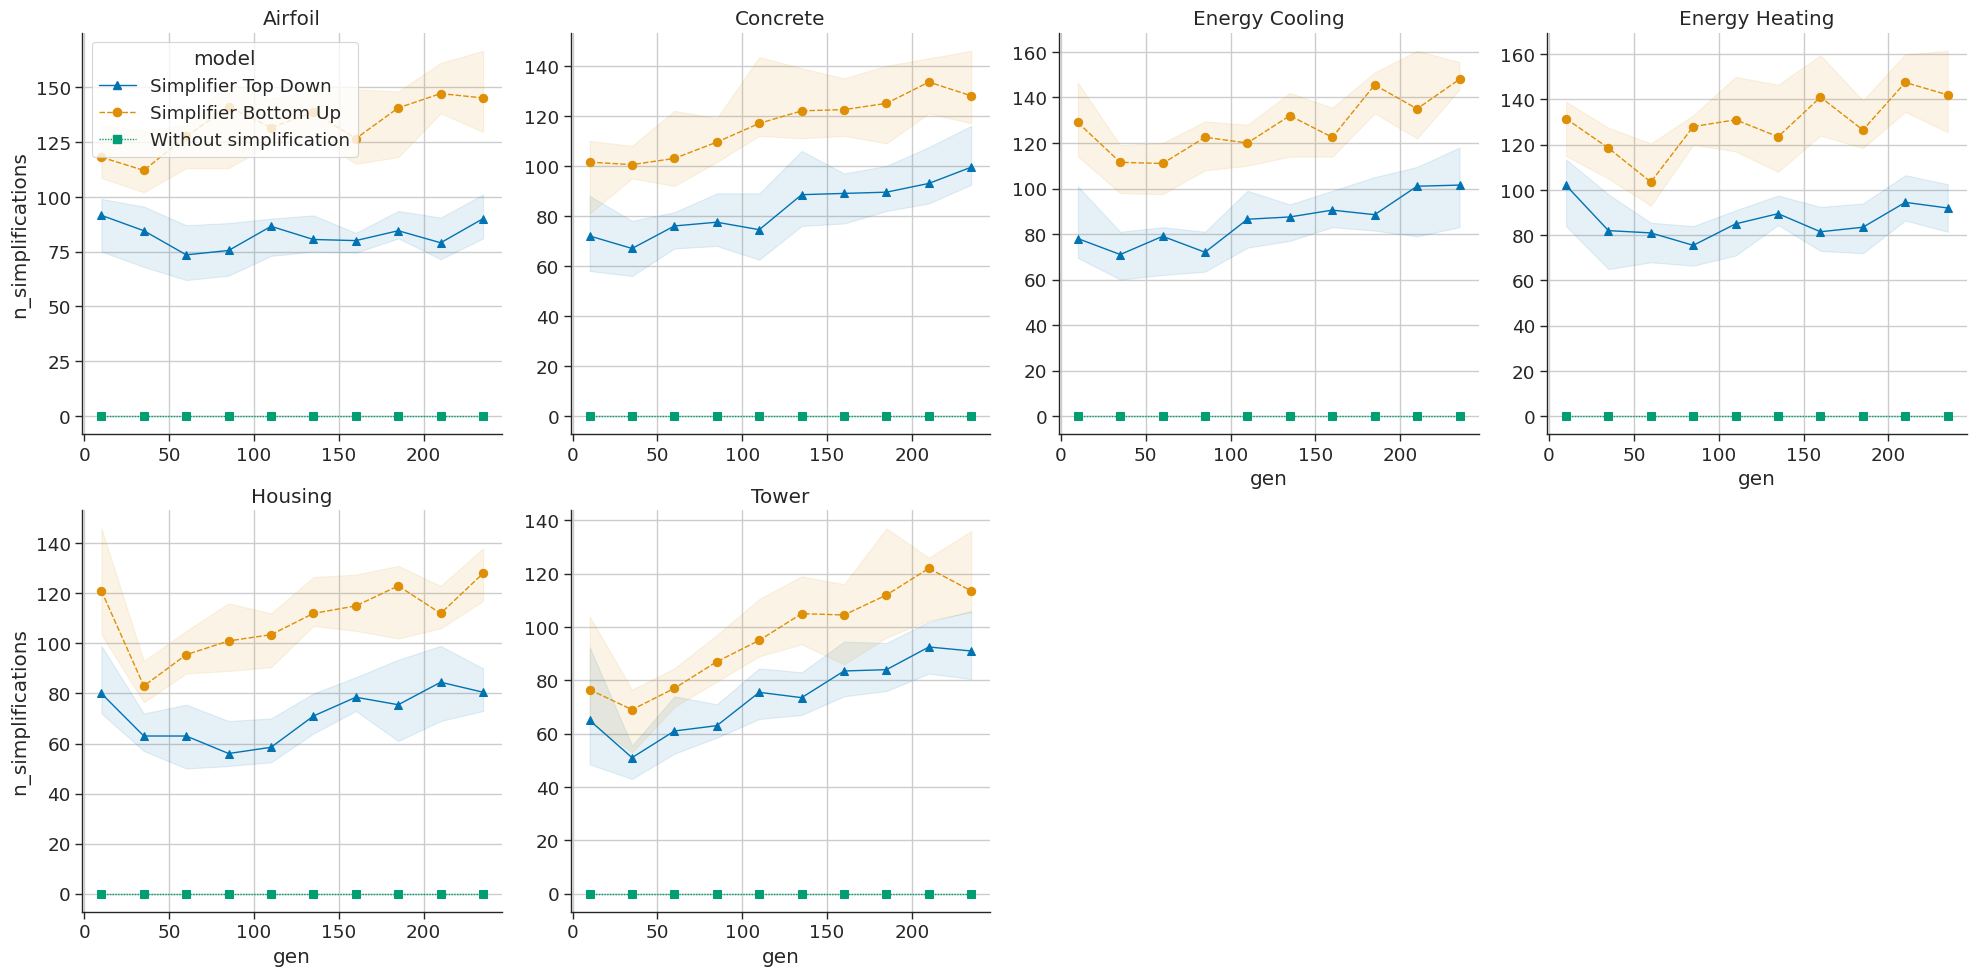

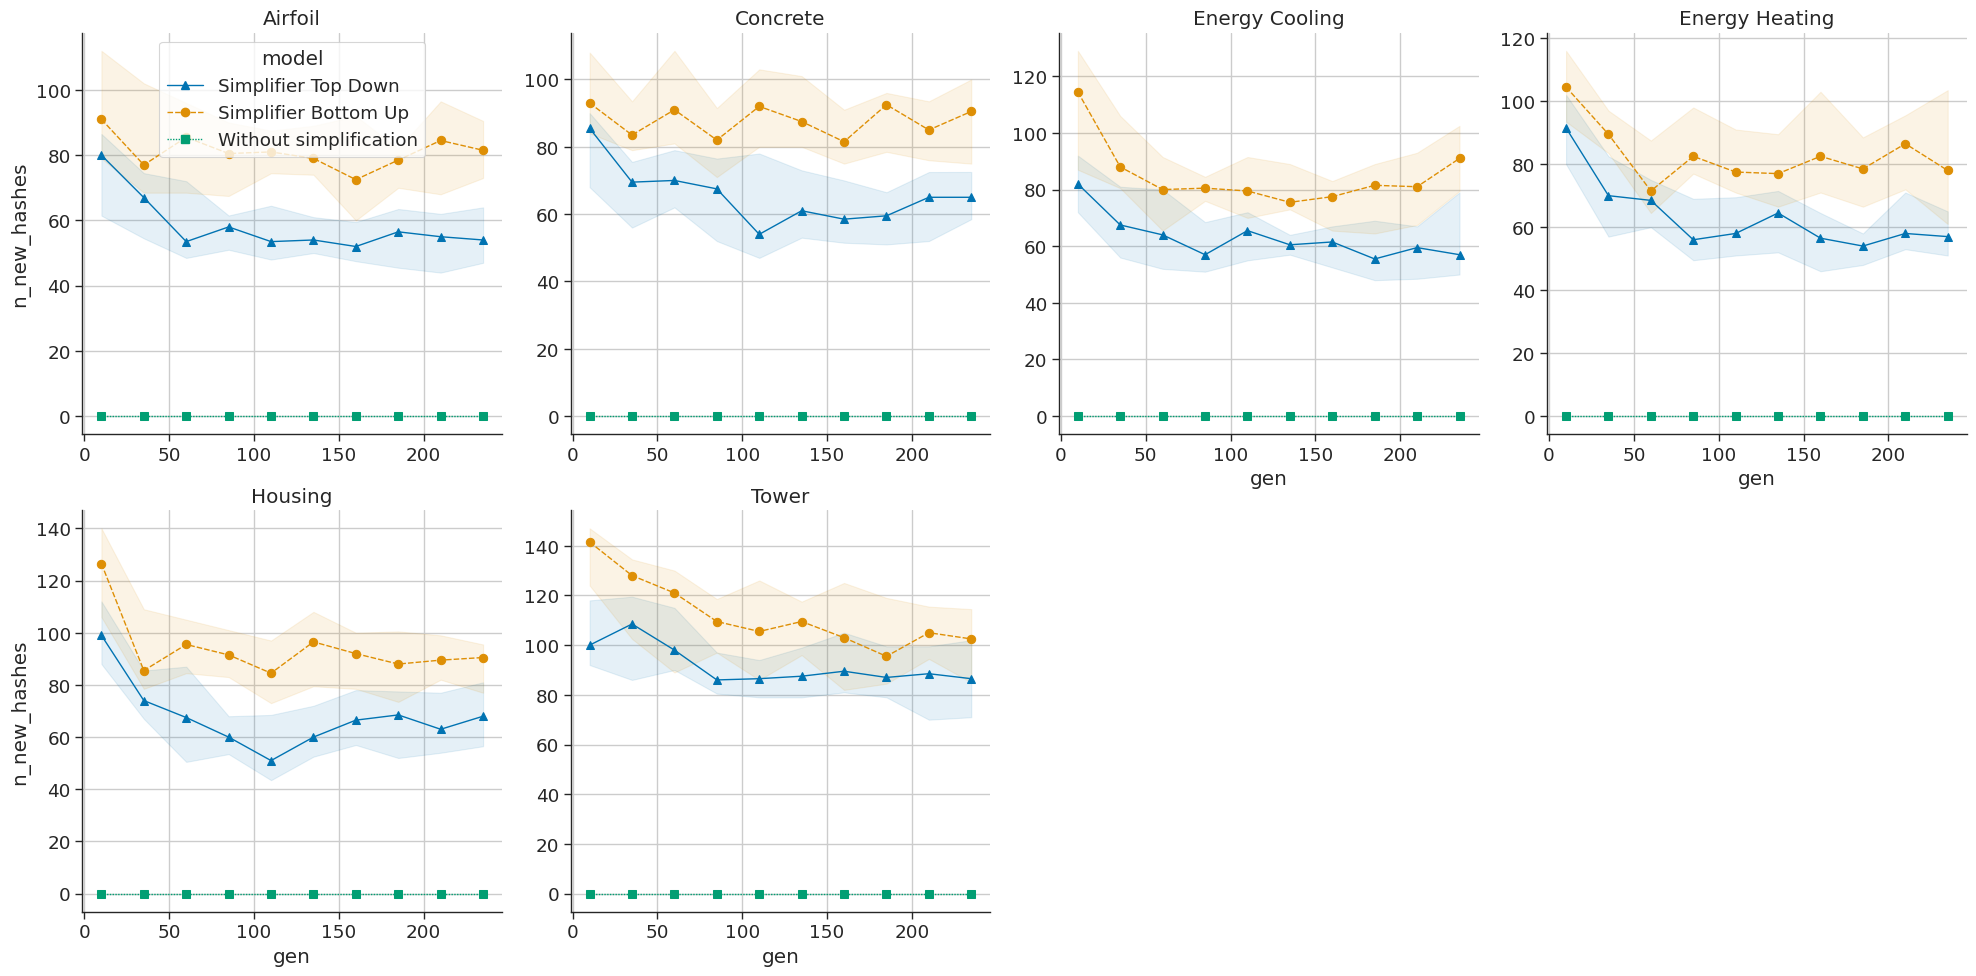

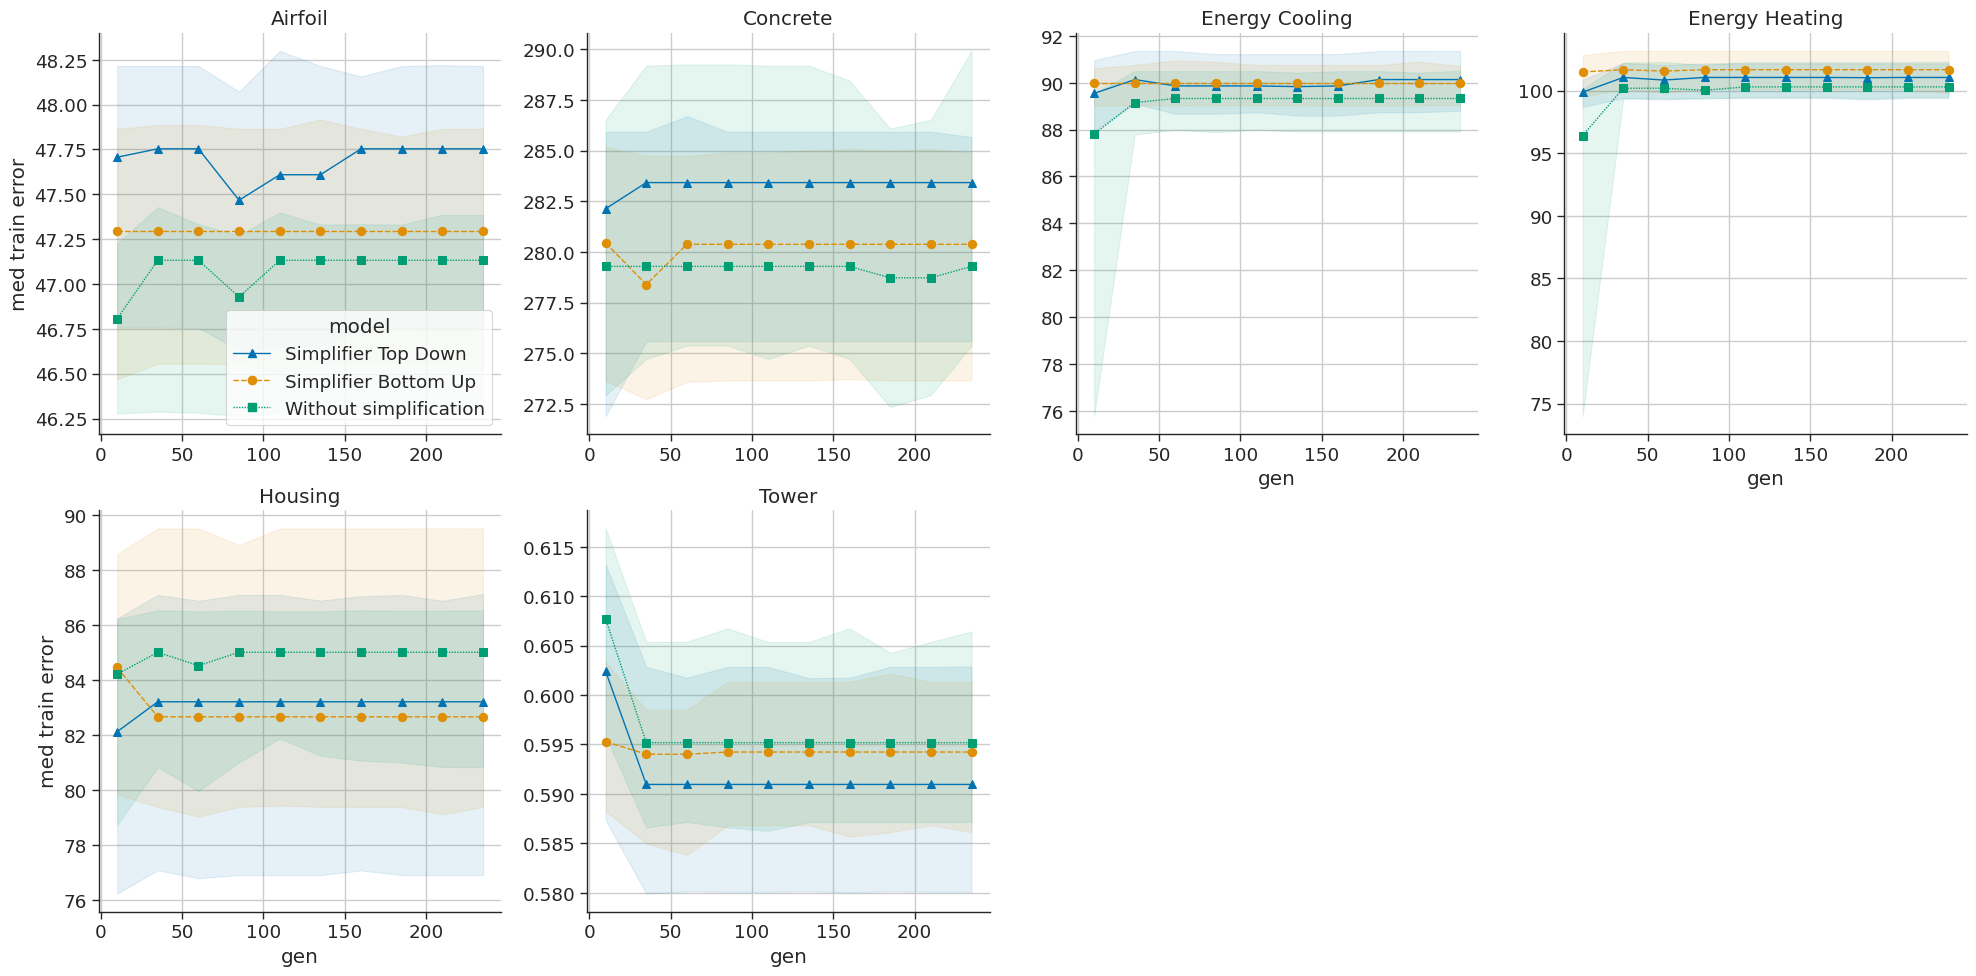

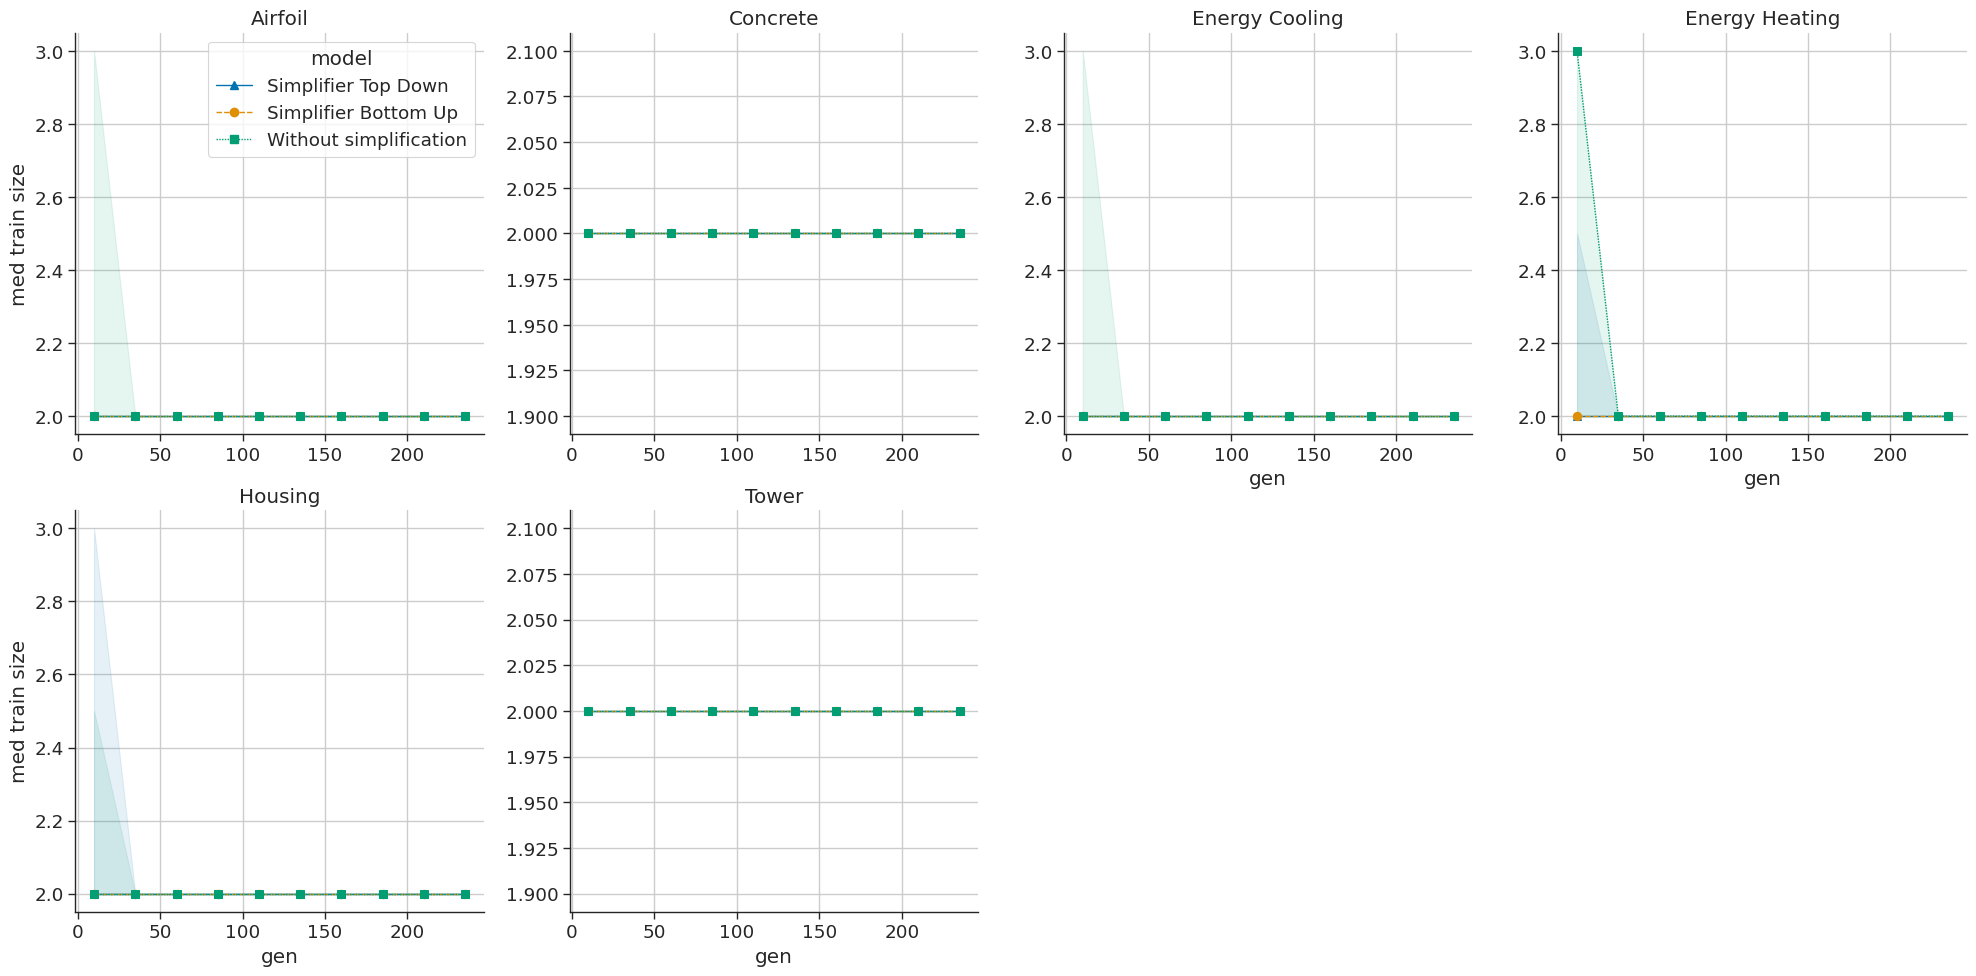

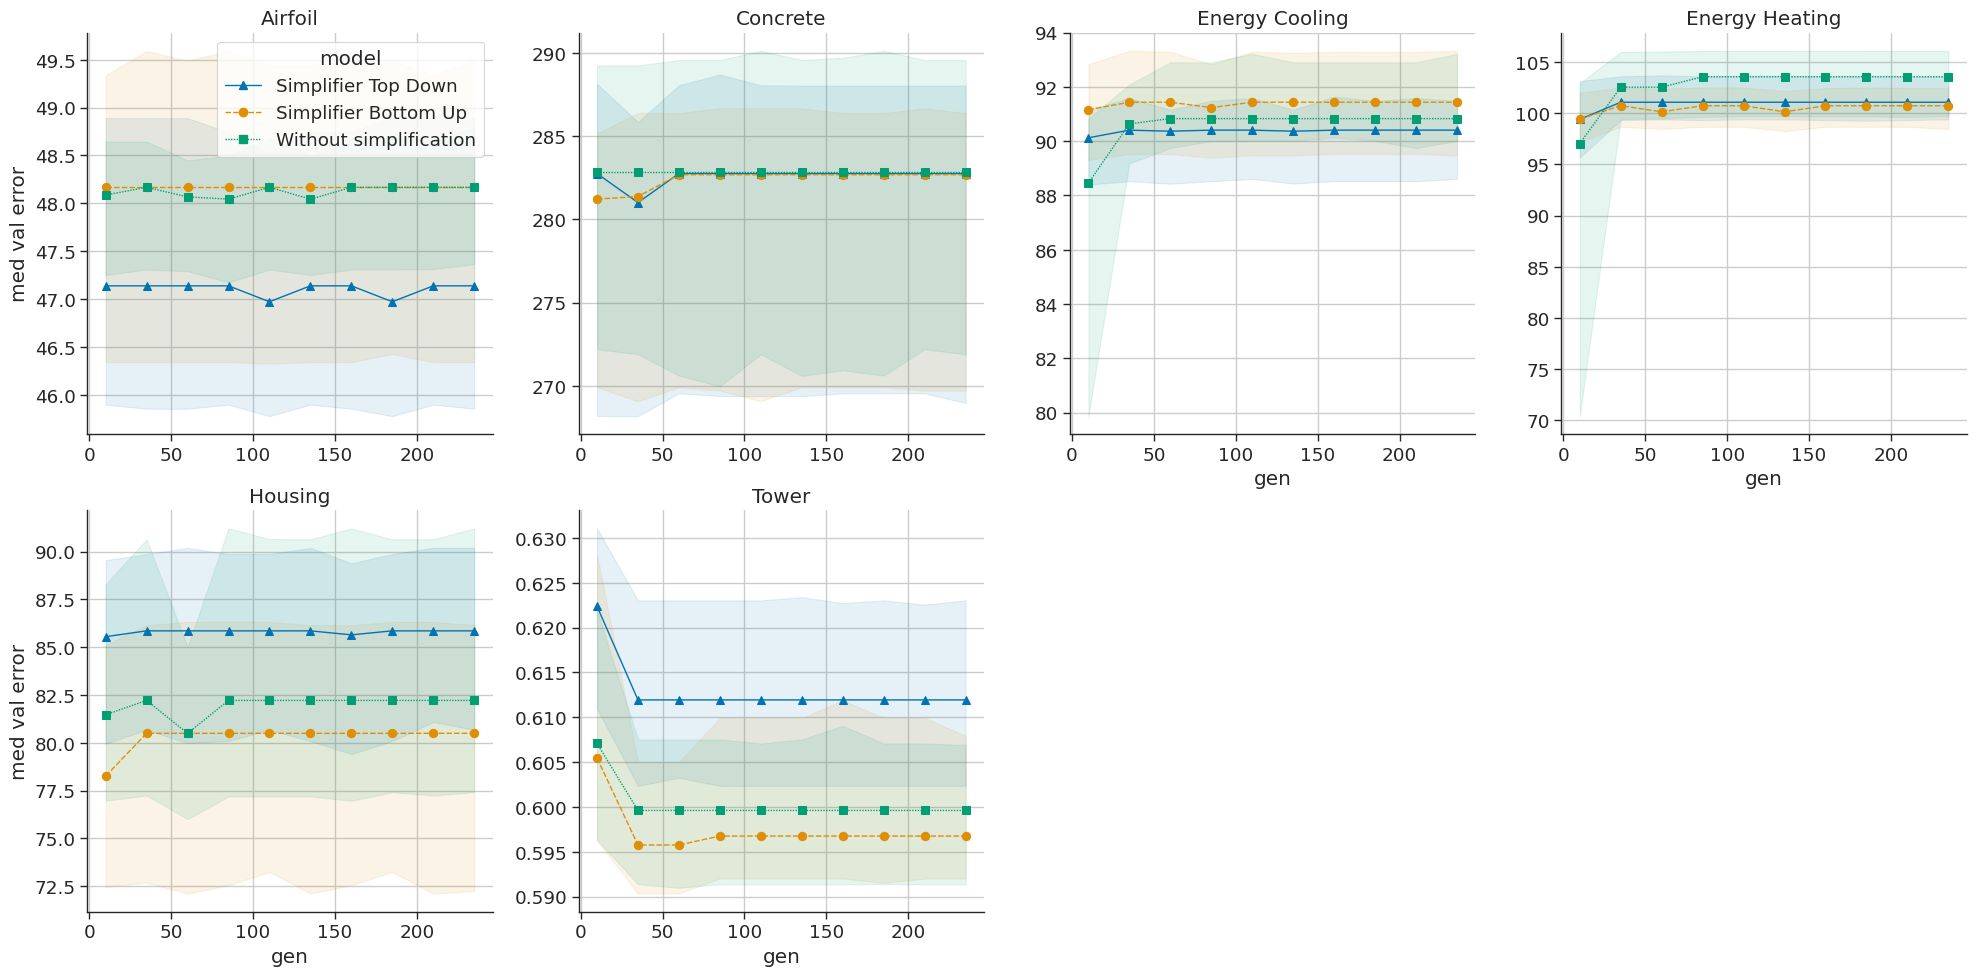

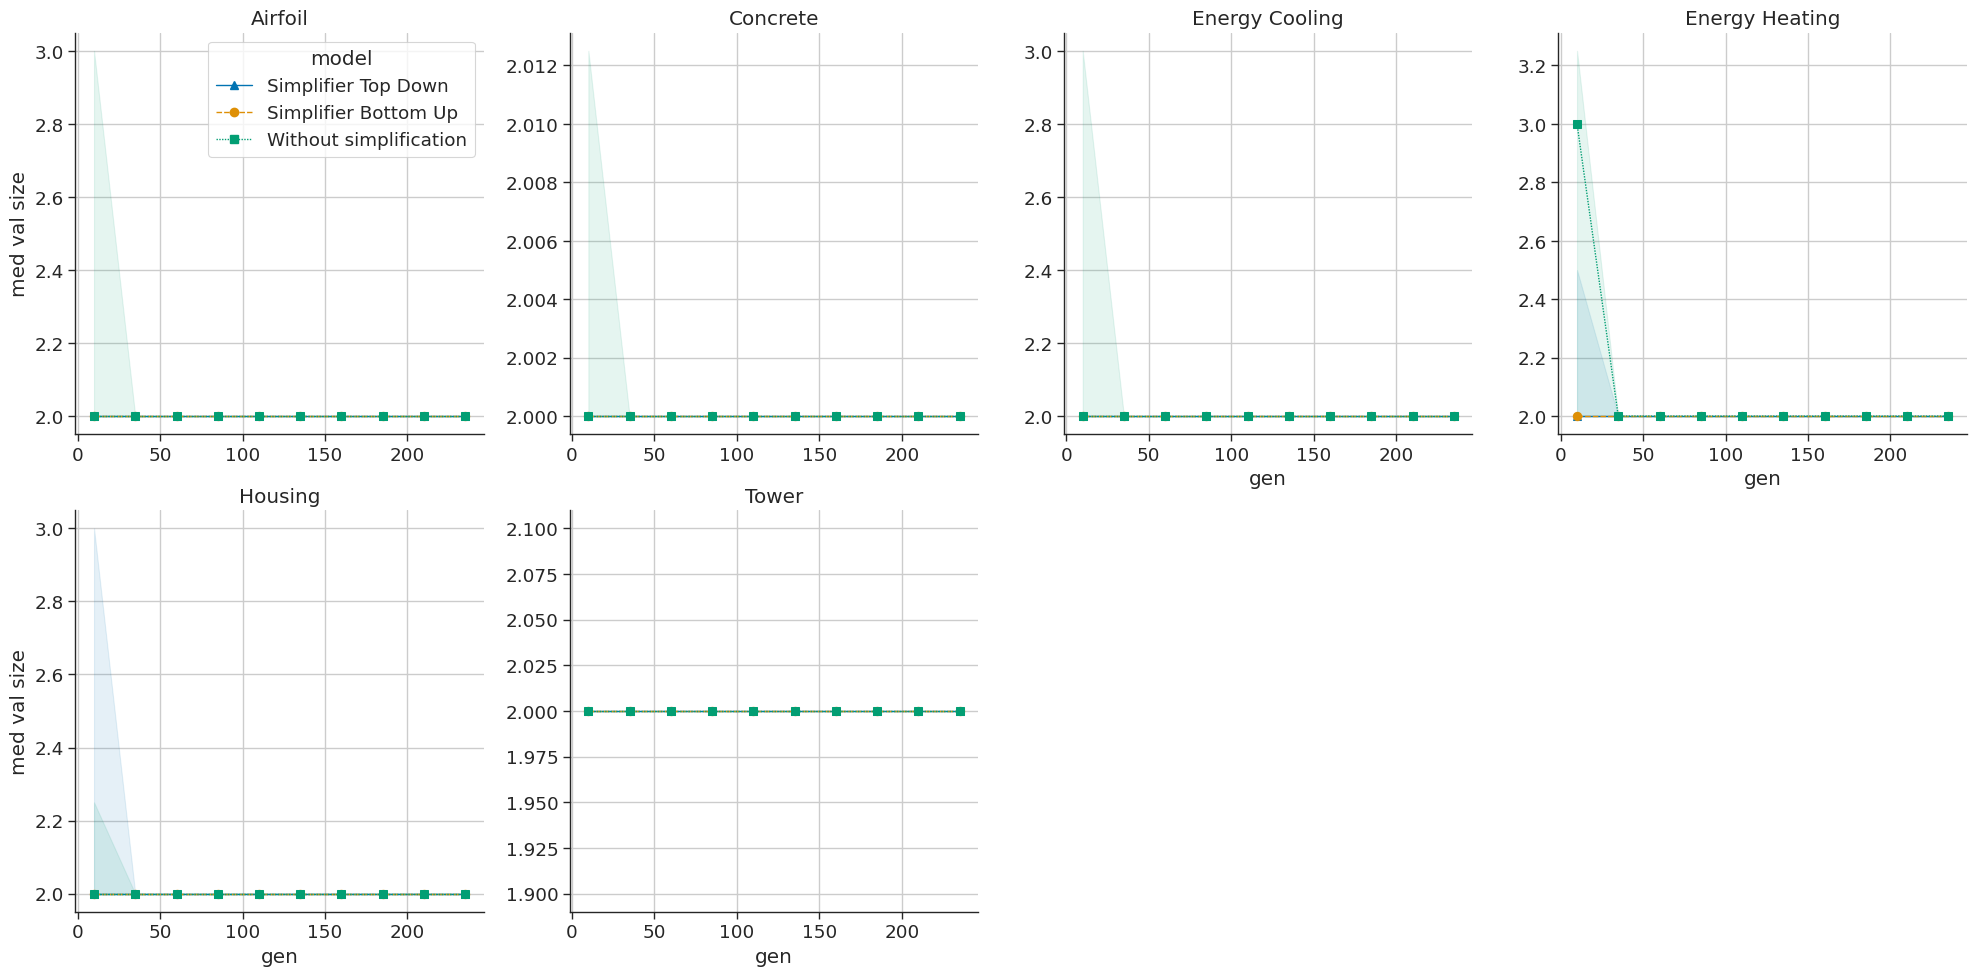

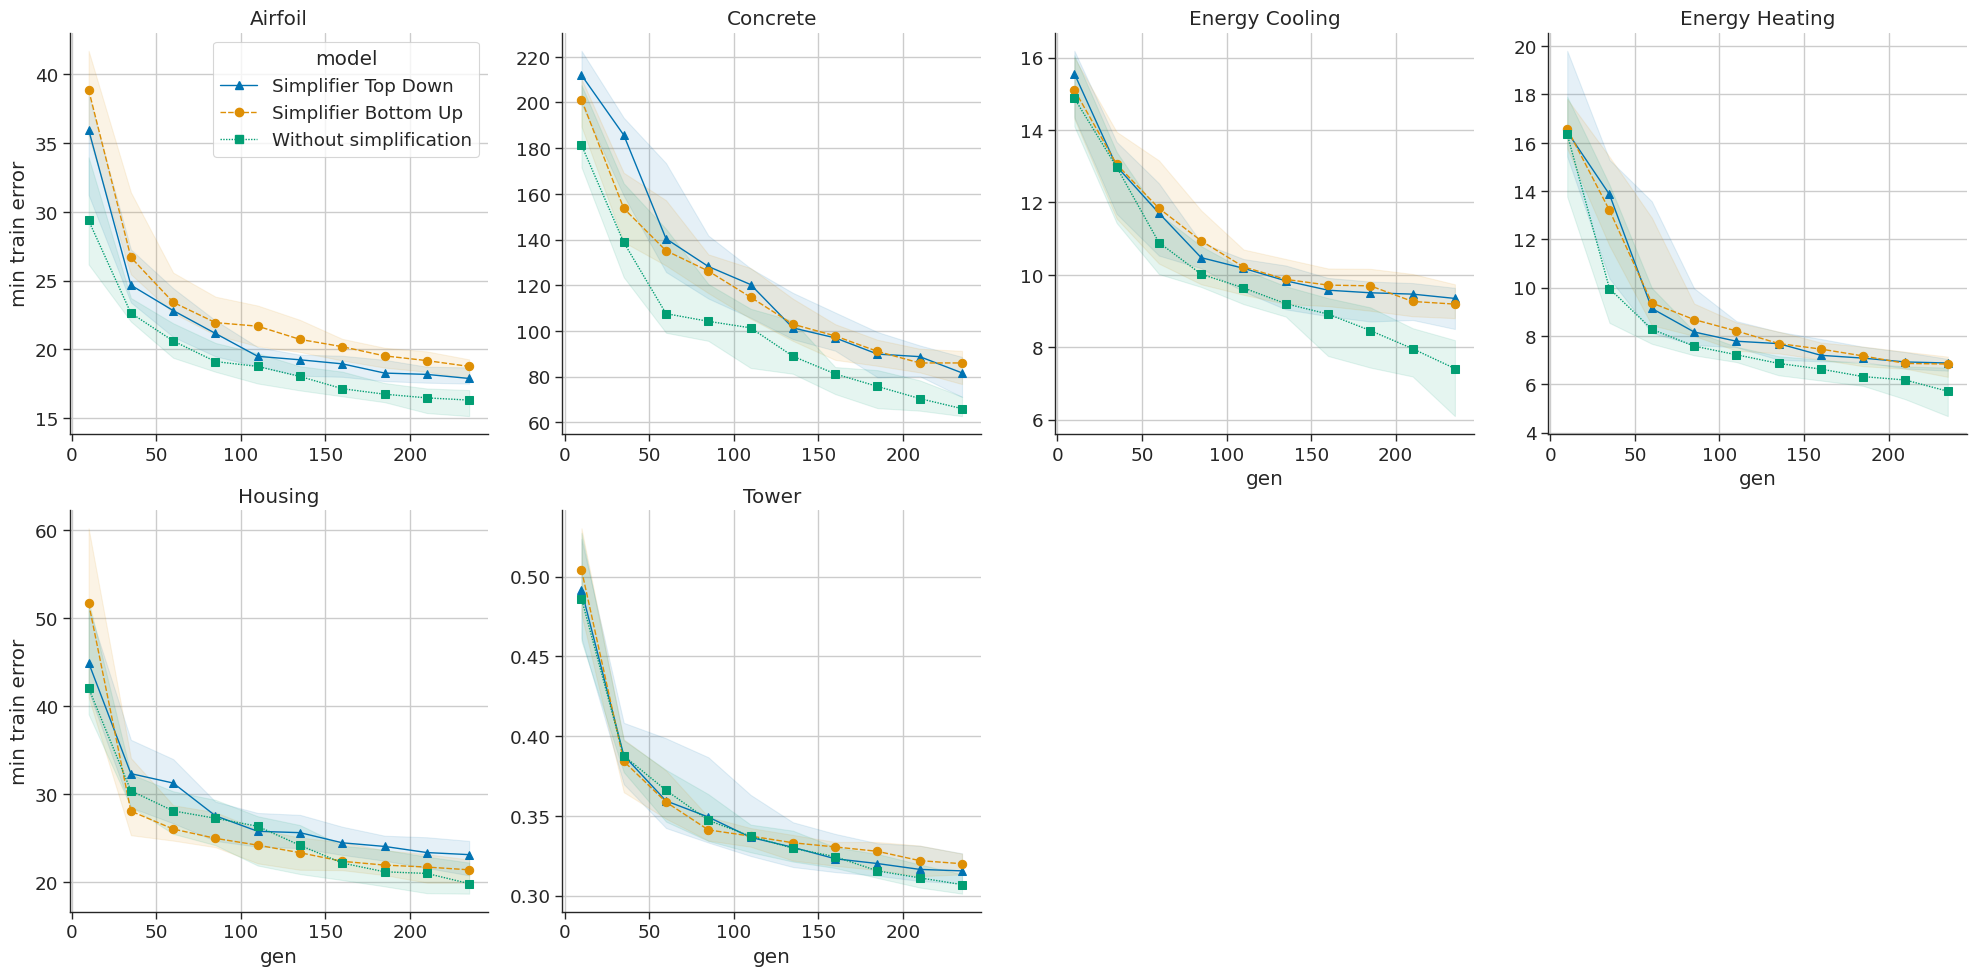

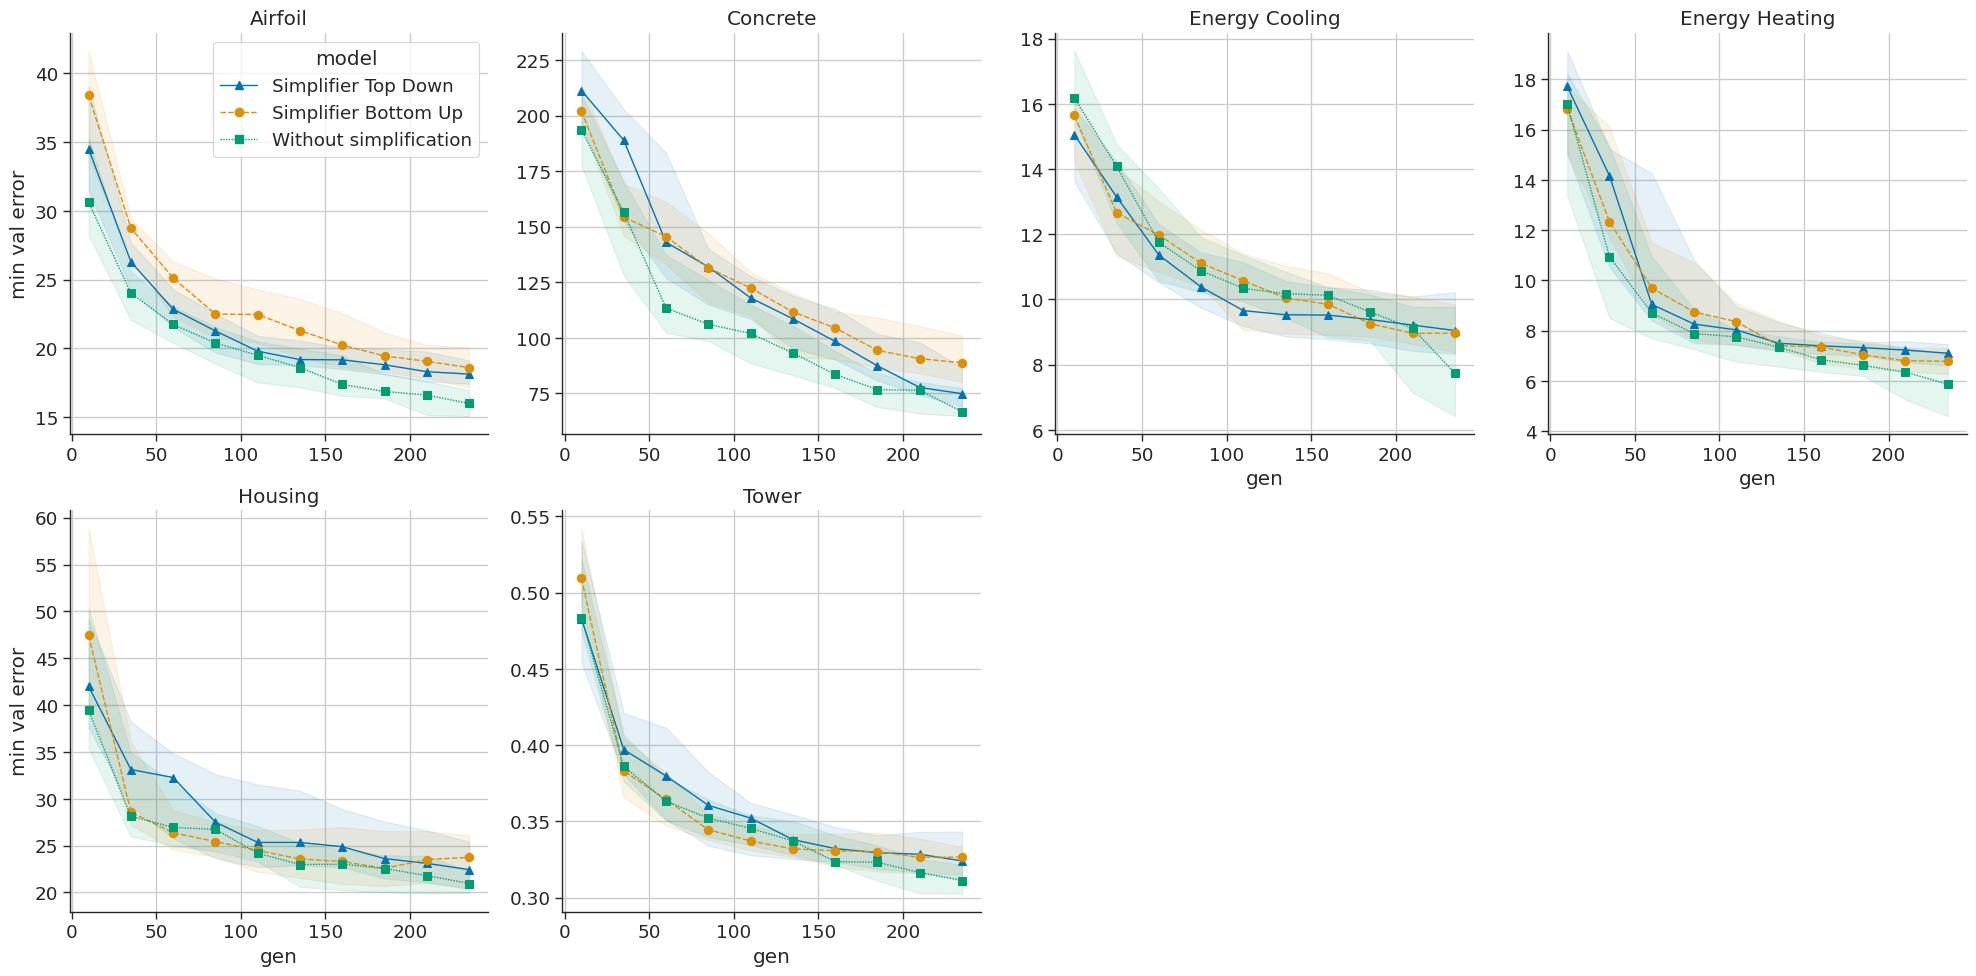

In [3]:
for col in [
    'best_size','n_simplifications','n_new_hashes','med train error','med train size',
    'med val error','med val size','min train error','min val error'
]:
    
    # about errors: https://seaborn.pydata.org/tutorial/error_bars.html
    g = sns.relplot(
        data=all_data_df,
        x="gen", y=col, col="dataset", hue="model",
        style="model", col_wrap=4, markers=marker_choice, markeredgecolor=None, 
        kind="line", facet_kws={'sharey': False, 'sharex': False, 'legend_out':False}, #errorbar=None, #('ci', 50),
        hue_order = order, estimator=np.median, markersize=6,
        
        # err_style='bars', err_kws={'capsize':2.0, 'linewidth':0.75},
        err_style='band', err_kws={'alpha':0.1},
    )
    g.set_titles("{col_name}")

    for (ds, plot_ax) in g._axes_dict.items():
        plot_ax.grid(which='major', axis='both', linewidth=1)

    if False: # use log scale
        # g.set(xscale="log")
        g.set(yscale="log")

    plt.tight_layout()
    plt.savefig(f"../paper/figs/{col}.pdf")
    plt.savefig(f"../paper/figs/{col}.png")
    plt.show()